In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [2]:
def fourierTransform(image):
    M,N=image.shape
    dft=np.zeros((M,N),dtype=np.complex128)
    a=np.array([[i] for i in range(image.shape[0])]).T/image.shape[0]
    b=np.array([[i] for i in range(image.shape[1])]).T/image.shape[1]
    c=np.ones(image.shape)
    a,b=a.T*c,c*b
    for i in range(M):
        #print(i)
        for j in range(N):
            exp=np.power(np.e,-2j*np.pi*(i*a+j*b))
            dft[i][j]=np.sum(image*exp)
    return dft
            
    
            

In [3]:
def inverseFourierTransform(image,size1,size2):
    M,N=size1,size2
    dft=np.zeros((size1,size2),dtype=np.complex128)
    a=np.array([[i] for i in range(M)]).T/M
    b=np.array([[i] for i in range(N)]).T/N
    c=np.ones((M,N))
    a,b=a.T*c,c*b
    for i in range(size1):
        #print(i)
        for j in range(size2):
            exp=np.power(np.e,2j*np.pi*(i*a+j*b))
            dft[i][j]=np.sum(image*exp)/(size1*size2)
    return dft
            

In [4]:
def rgbToGray(image):
    output=np.zeros(image.shape[:-1])
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            output[i][j]=image[i][j][0]*0.30 + image[i][j][1]*0.59 + image[i][j][0]*0.11
    return np.rint(output).astype(np.uint8)

In [5]:
def hybridImages(image1,image2,alpha,beta):
    image1=cv2.resize(image1,(100,100))
    image2=cv2.resize(image2,(100,100))
    r1=rgbToGray(image1)
    r2=rgbToGray(image2)
    print(1)
    rdft1=fourierTransform(r1)
    print(2)
    rdft2=fourierTransform(r2)
    i=np.arange(100).reshape((100,1))
    j=np.arange(100).reshape((1,100))
    c=np.ones((100,100))
    highind=np.sqrt((c*j)**2+(c*i)**2)>alpha
    lowind=np.sqrt((c*j)**2+(c*i)**2)<beta
    rdft1[highind]=0
    rdft2[lowind]=0
    print(3)
    return np.absolute(inverseFourierTransform(rdft1+rdft2,100,100))
    

In [8]:
iamge1=cv2.resize(cv2.imread('./image1.jpg'),(100,100))[:,:,::-1]
image2=cv2.resize(cv2.imread('./image2.jpg'),(100,100))[:,:,::-1]

1
2
3


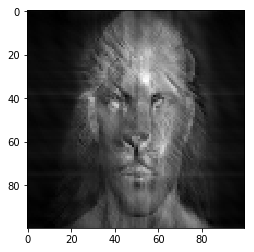

In [23]:
plt.imshow(hybridImages(image2,image1,90,90),cmap='gray')